In [1]:
import pandas as pd
import numpy as np

In [131]:
## import data
variables = pd.read_csv('variables.csv')
variables = variables.drop(columns = ['Unnamed: 0'])
variables.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,Total__Merchnum_1Count__Merchnum_7,Total__Merchnum_1Total__Merchnum_7,Total__Merchnum_1Count__Cardnum_14,Total__Merchnum_1Total__Cardnum_14,Total__Merchnum_1Count__Merchnum_14,Total__Merchnum_1Total__Merchnum_14,Total__Merchnum_1Count__Cardnum_30,Total__Merchnum_1Total__Cardnum_30,Total__Merchnum_1Count__Merchnum_30,Total__Merchnum_1Total__Merchnum_30
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,143.840000,4.417012,539.40,149.005525,269.700000,8.281898,1114.76,307.944751,557.380000,17.115922
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803,P,31.42,0,...,6874.708571,8.000000,90230.55,2871.755251,12890.078571,15.000000,186476.47,5934.960853,26639.495714,31.000000
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706,P,178.49,0,...,793.209843,8.000000,568136.55,3183.016135,1434.688258,14.770570,1174148.87,6578.233346,2877.815858,29.562589
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118,P,3.62,0,...,858.248499,7.094196,696790.50,192483.563536,1451.646875,12.479536,1440033.70,397799.364641,2834.712008,24.368456
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118,P,3.62,0,...,89.920000,8.000000,168.60,46.574586,168.600000,15.000000,348.44,96.254144,348.440000,31.000000


In [132]:
features = ['Median__Cardnum_1',
 'Total__Cardnum_1',
 'Max__Cardnum_7',
 'Average__Cardnum_14',
 'Median__Cardnum_30',
 'Total__Cardnum_30',
 'Total__Cardnum_Merchnum_14',
 'Max__Cardnum_Merchnum_30',
 'Total__Cardnum_Merchnum_30',
 'Max__Cardnum_Merch zip_1',
 'Average__Cardnum_Merch zip_14',
 'Total__Cardnum_Merch zip_30',
 'Actual/Total__Cardnum_Merchnum_1',
 'Actual/Median__Merchnum_14',
 'Total__Cardnum_1Count__Cardnum_14']

In [133]:
features = features +['Fraud','Recnum']

In [134]:
v_oot = variables[variables['Date']>'2010-10-31']
v_oot = v_oot.loc[:,features]
X_oot = v_oot.drop(columns = ['Recnum','Fraud'])
y_oot = v_oot['Fraud']

In [135]:
v_bfoot = variables[variables['Date']<='2010-10-31']
v_bfoot = v_bfoot.loc[:,features]
## split training and testing
v_test = v_bfoot.sample(frac = 0.3)
v_train = v_bfoot.drop(v_test.index)
X_train = v_train.drop(columns = ['Recnum','Fraud'])
y_train = v_train['Fraud']
X_test = v_test.drop(columns = ['Recnum','Fraud'])
y_test = v_test['Fraud']

## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [14]:
lg = LogisticRegression(random_state=0).fit(X_train,y_train)

/Users/Luna/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Luna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [15]:
## training
lg.score(X_train, y_train, sample_weight=None)

0.9923612174416033

In [16]:
## testing
lg.score(X_test, y_test, sample_weight=None)

0.9932515580961454

In [17]:
## oot
lg.score(X_oot, y_oot, sample_weight=None)

0.9868029291059789

In [18]:
lg_train_pred = lg.predict(X_train)

In [26]:
(lg_train_pred==y_train).mean()

0.9923612174416033

In [41]:
# predictions for training data
lg_train_prob = lg.predict_proba(X_train)
train_probs = pd.DataFrame(y_train).reset_index(drop=True)
train_probs['lg'] = pd.DataFrame(lg_train_prob).iloc[:,1]

In [63]:
# predictions for testing data
lg_test_prob = lg.predict_proba(X_test)
test_probs = pd.DataFrame(y_test).reset_index(drop=True)
test_probs['lg'] = pd.DataFrame(lg_test_prob).iloc[:,1]

In [65]:
# predictions for oot data
lg_oot_prob = lg.predict_proba(X_oot)
oot_probs = pd.DataFrame(y_oot).reset_index(drop=True)
oot_probs['lg'] = pd.DataFrame(lg_oot_prob).iloc[:,1]

## Random Forests

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rfc = RandomForestClassifier(n_estimators=1000, max_depth = 18, random_state=0).fit(X_train,y_train)

In [23]:
## training
rfc.score(X_train, y_train, sample_weight=None)

0.9979924803075928

In [24]:
# testing
rfc.score(X_test, y_test, sample_weight=None)

0.9955539676868723

In [25]:
## oot
rfc.score(X_oot, y_oot, sample_weight=None)

0.9868833990504546

In [71]:
rfc_train_prob = rfc.predict_proba(X_train)
train_probs['rfc'] = pd.DataFrame(rfc_train_prob).iloc[:,1]
rfc_test_prob = rfc.predict_proba(X_test)
test_probs['rfc'] = pd.DataFrame(rfc_test_prob).iloc[:,1]
rfc_oot_prob = rfc.predict_proba(X_oot)
oot_probs['rfc'] = pd.DataFrame(rfc_oot_prob).iloc[:,1]

## Neural Networks

In [136]:
from sklearn.neural_network import MLPClassifier

In [161]:
nn = MLPClassifier(solver='adam', hidden_layer_sizes=(7), random_state=0).fit(X_train,y_train)

In [147]:
## training
nn.score(X_train, y_train, sample_weight=None)

0.9893669507817417

In [148]:
## testing
nn.score(X_test, y_test, sample_weight=None)

0.9898773371442182

In [149]:
## oot
nn.score(X_oot, y_oot, sample_weight=None)

0.9855958799388428

In [162]:
train_prob = nn.predict_proba(X_train)
train_probs['nn'] = pd.DataFrame(train_prob).iloc[:,1]
test_prob = nn.predict_proba(X_test)
test_probs['nn'] = pd.DataFrame(test_prob).iloc[:,1]
oot_prob = nn.predict_proba(X_oot)
oot_probs['nn'] = pd.DataFrame(oot_prob).iloc[:,1]

In [107]:
nn_train_pred = nn.predict(X_train)

In [113]:
nn_train_prob = nn.predict_proba(X_train)

In [118]:
pd.DataFrame(nn_train_prob).head(10)

,0,1
0,0.996923,3.077112e-03
1,1.000000,1.298984e-15
2,0.596388,4.036116e-01
3,0.596445,4.035553e-01
4,0.999991,8.760081e-06
5,0.368525,6.314747e-01
6,0.269907,7.300932e-01
7,1.000000,3.670860e-12
8,0.482928,5.170724e-01
9,0.369449,6.305509e-01


In [142]:
sum(nn_train_pred)

2571

In [141]:
(nn_train_pred==y_train).mean()

0.9471920243624423

In [127]:
sum(rfc_train_pred)

522

In [120]:
(train_probs['nn']>0.5).sum()

115

In [100]:
sum(y_train)

640

## Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB

In [89]:
gnb = GaussianNB().fit(X_train,y_train)

In [121]:
## training
gnb.score(X_train, y_train, sample_weight=None)

0.9721329046087889

In [122]:
## testing
gnb.score(X_test, y_test, sample_weight=None)

0.9734825929895597

In [123]:
## oot
gnb.score(X_oot, y_oot, sample_weight=None)

0.967087792709423

In [90]:
train_prob = gnb.predict_proba(X_train)
train_probs['gnb'] = pd.DataFrame(train_prob).iloc[:,1]
test_prob = gnb.predict_proba(X_test)
test_probs['gnb'] = pd.DataFrame(test_prob).iloc[:,1]
oot_prob = gnb.predict_proba(X_oot)
oot_probs['gnb'] = pd.DataFrame(oot_prob).iloc[:,1]

## FDR Table

In [93]:
def getFDR(df, percentage=3):
    df.columns = ['Label','Score']
    num_rows = round(len(df)*percentage/100)
    num_bads = sum(df['Label'])
    df = df.sort_values('Score',ascending=False).head(num_rows)
    FDR = sum(df.iloc[:,0])/num_bads
    return FDR*100

In [101]:
FDR_table = pd.DataFrame(columns=['Training','Testing','OOT'],index=['LG','RF','NN','GNB'])

In [163]:
FDR_table.loc['LG','Training'] = getFDR(train_probs.loc[:,['Fraud','lg']])
FDR_table.loc['RF','Training'] = getFDR(train_probs.loc[:,['Fraud','rfc']])
FDR_table.loc['NN','Training'] = getFDR(train_probs.loc[:,['Fraud','nn']])
FDR_table.loc['GNB','Training'] = getFDR(train_probs.loc[:,['Fraud','gnb']])
FDR_table.loc['LG','Testing'] = getFDR(test_probs.loc[:,['Fraud','lg']])
FDR_table.loc['RF','Testing'] = getFDR(test_probs.loc[:,['Fraud','rfc']])
FDR_table.loc['NN','Testing'] = getFDR(test_probs.loc[:,['Fraud','nn']])
FDR_table.loc['GNB','Testing'] = getFDR(test_probs.loc[:,['Fraud','gnb']])
FDR_table.loc['LG','OOT'] = getFDR(oot_probs.loc[:,['Fraud','lg']])
FDR_table.loc['RF','OOT'] = getFDR(oot_probs.loc[:,['Fraud','rfc']])
FDR_table.loc['NN','OOT'] = getFDR(oot_probs.loc[:,['Fraud','nn']])
FDR_table.loc['GNB','OOT'] = getFDR(oot_probs.loc[:,['Fraud','gnb']])

In [164]:
FDR_table

,Training,Testing,OOT
LG,55,54.5833,39.1061
RF,100,86.6667,46.3687
NN,4.53125,2.91667,53.0726
GNB,58.4375,57.0833,32.4022


## Final Model Summary Tables

In [246]:
rfc_train_prob = train_probs.loc[:,['Fraud','rfc']].sort_values('rfc',ascending=False)
rfc_train_prob['bin'] = 100-pd.qcut(rfc_train_prob.loc[:,'rfc'],100,labels=False)
temp = rfc_train_prob[rfc_train_prob['bin']<=20]
train_BS = temp.groupby('bin').agg({'bin':'count','Fraud':'sum'})
train_BS.columns = ['#Records','#Bads']
train_BS['#Goods'] = train_BS['#Records'] - train_BS['#Bads']
train_BS['%Bads'] = train_BS['#Bads']*100/train_BS['#Records']
train_BS['%Goods'] = train_BS['#Goods']*100/train_BS['#Records']
for bin in range(1,21):
    train_BS.loc[bin,'Total #Records'] = sum(train_BS.loc[range(1,bin+1),'#Records'])
    train_BS.loc[bin,'Culmulative #Bads'] = sum(train_BS.loc[range(1,bin+1),'#Bads'])
    train_BS.loc[bin,'Culmulative #Goods'] = sum(train_BS.loc[range(1,bin+1),'#Goods'])
train_total_Bad = sum(rfc_train_prob['Fraud'])
train_total_Good = len(rfc_train_prob)-train_total_Bad
train_BS['Culmulative %Bads'] = train_BS['Culmulative #Bads']*100/train_total_Bad
train_BS['Culmulative %Goods'] = train_BS['Culmulative #Goods']*100/train_total_Good
train_BS['KS'] = train_BS['Culmulative %Bads']-train_BS['Culmulative %Goods']
train_BS['FPR'] = train_BS['Culmulative #Goods']/train_BS['Culmulative #Bads']

In [237]:
print(len(rfc_train_prob))
print(train_total_Bad)
print(train_total_Good)

58779
640
58139


In [247]:
train_BS.reset_index()

,bin,#Records,#Bads,#Goods,%Bads,%Goods,Total #Records,Culmulative #Bads,Culmulative #Goods,Culmulative %Bads,Culmulative %Goods,KS,FPR
0,1,588,588,0,100.000000,0.000000,588.0,588.0,0.0,91.875,0.000000,91.875000,0.000000
1,2,588,52,536,8.843537,91.156463,1176.0,640.0,536.0,100.000,0.921928,99.078072,0.837500
2,3,588,0,588,0.000000,100.000000,1764.0,640.0,1124.0,100.000,1.933298,98.066702,1.756250
3,4,588,0,588,0.000000,100.000000,2352.0,640.0,1712.0,100.000,2.944667,97.055333,2.675000
4,5,587,0,587,0.000000,100.000000,2939.0,640.0,2299.0,100.000,3.954316,96.045684,3.592188
5,6,588,0,588,0.000000,100.000000,3527.0,640.0,2887.0,100.000,4.965686,95.034314,4.510937
6,7,588,0,588,0.000000,100.000000,4115.0,640.0,3475.0,100.000,5.977055,94.022945,5.429688
7,8,588,0,588,0.000000,100.000000,4703.0,640.0,4063.0,100.000,6.988424,93.011576,6.348438
8,9,588,0,588,0.000000,100.000000,5291.0,640.0,4651.0,100.000,7.999794,92.000206,7.267188
9,10,587,0,587,0.000000,100.000000,5878.0,640.0,5238.0,100.000,9.009443,90.990557,8.184375


In [230]:
rfc_test_prob = test_probs.loc[:,['Fraud','rfc']].sort_values('rfc',ascending=False)
rfc_test_prob['bin'] = 100-pd.qcut(rfc_test_prob.loc[:,'rfc'],100,labels=False)
temp = rfc_test_prob[rfc_test_prob['bin']<=20]
test_BS = temp.groupby('bin').agg({'bin':'count','Fraud':'sum'})
test_BS.columns = ['#Records','#Bads']
test_BS['#Goods'] = test_BS['#Records'] - test_BS['#Bads']
test_BS['%Bads'] = test_BS['#Bads']*100/test_BS['#Records']
test_BS['%Goods'] = test_BS['#Goods']*100/test_BS['#Records']
for bin in range(1,21):
    test_BS.loc[bin,'Total #Records'] = sum(test_BS.loc[range(1,bin+1),'#Records'])
    test_BS.loc[bin,'Culmulative #Bads'] = sum(test_BS.loc[range(1,bin+1),'#Bads'])
    test_BS.loc[bin,'Culmulative #Goods'] = sum(test_BS.loc[range(1,bin+1),'#Goods'])
test_total_Bad = sum(rfc_test_prob['Fraud'])
test_total_Good = len(rfc_test_prob)-test_total_Bad
test_BS['Culmulative %Bads'] = test_BS['Culmulative #Bads']*100/test_total_Bad
test_BS['Culmulative %Goods'] = test_BS['Culmulative #Goods']*100/test_total_Good
test_BS['KS'] = test_BS['Culmulative %Bads']-test_BS['Culmulative %Goods']
test_BS['FPR'] = test_BS['Culmulative #Goods']/test_BS['Culmulative #Bads']

In [240]:
print(len(rfc_test_prob))
print(test_total_Bad)
print(test_total_Good)

25191
240
24951


In [239]:
test_BS

,#Records,#Bads,#Goods,%Bads,%Goods,Total #Records,Culmulative #Bads,Culmulative #Goods,Culmulative %Bads,Culmulative %Goods,KS,FPR
bin,,,,,,,,,,,,
1,252,166,86,65.873016,34.126984,252.0,166.0,86.0,69.166667,0.344676,68.821991,0.518072
2,252,33,219,13.095238,86.904762,504.0,199.0,305.0,82.916667,1.222396,81.694271,1.532663
3,252,9,243,3.571429,96.428571,756.0,208.0,548.0,86.666667,2.196305,84.470362,2.634615
4,252,7,245,2.777778,97.222222,1008.0,215.0,793.0,89.583333,3.178229,86.405104,3.688372
5,252,1,251,0.396825,99.603175,1260.0,216.0,1044.0,90.000000,4.184201,85.815799,4.833333
6,252,4,248,1.587302,98.412698,1512.0,220.0,1292.0,91.666667,5.178149,86.488517,5.872727
7,252,3,249,1.190476,98.809524,1764.0,223.0,1541.0,92.916667,6.176105,86.740562,6.910314
8,252,1,251,0.396825,99.603175,2016.0,224.0,1792.0,93.333333,7.182077,86.151256,8.000000
9,252,0,252,0.000000,100.000000,2268.0,224.0,2044.0,93.333333,8.192056,85.141277,9.125000


In [248]:
rfc_oot_prob = oot_probs.loc[:,['Fraud','rfc']].sort_values('rfc',ascending=False)
rfc_oot_prob['bin'] = 100-pd.qcut(rfc_oot_prob.loc[:,'rfc'],100,labels=False)
temp = rfc_oot_prob[rfc_oot_prob['bin']<=20]
oot_BS = temp.groupby('bin').agg({'bin':'count','Fraud':'sum'})
oot_BS.columns = ['#Records','#Bads']
oot_BS['#Goods'] = oot_BS['#Records'] - oot_BS['#Bads']
oot_BS['%Bads'] = oot_BS['#Bads']*100/oot_BS['#Records']
oot_BS['%Goods'] = oot_BS['#Goods']*100/oot_BS['#Records']
for bin in range(1,21):
    oot_BS.loc[bin,'Total #Records'] = sum(oot_BS.loc[range(1,bin+1),'#Records'])
    oot_BS.loc[bin,'Culmulative #Bads'] = sum(oot_BS.loc[range(1,bin+1),'#Bads'])
    oot_BS.loc[bin,'Culmulative #Goods'] = sum(oot_BS.loc[range(1,bin+1),'#Goods'])
oot_total_Bad = sum(rfc_oot_prob['Fraud'])
oot_total_Good = len(rfc_oot_prob)-oot_total_Bad
oot_BS['Culmulative %Bads'] = oot_BS['Culmulative #Bads']*100/oot_total_Bad
oot_BS['Culmulative %Goods'] = oot_BS['Culmulative #Goods']*100/oot_total_Good
oot_BS['KS'] = oot_BS['Culmulative %Bads']-oot_BS['Culmulative %Goods']
oot_BS['FPR'] = oot_BS['Culmulative #Goods']/oot_BS['Culmulative #Bads']

In [244]:
print(len(rfc_oot_prob))
print(oot_total_Bad)
print(oot_total_Good)

12427
179
12248


In [249]:
oot_BS

,#Records,#Bads,#Goods,%Bads,%Goods,Total #Records,Culmulative #Bads,Culmulative #Goods,Culmulative %Bads,Culmulative %Goods,KS,FPR
bin,,,,,,,,,,,,
1,125,52,73,41.600000,58.400000,125.0,52.0,73.0,29.050279,0.596016,28.454264,1.403846
2,124,17,107,13.709677,86.290323,249.0,69.0,180.0,38.547486,1.469628,37.077858,2.608696
3,124,14,110,11.290323,88.709677,373.0,83.0,290.0,46.368715,2.367734,44.000982,3.493976
4,125,20,105,16.000000,84.000000,498.0,103.0,395.0,57.541899,3.225016,54.316883,3.834951
5,124,6,118,4.838710,95.161290,622.0,109.0,513.0,60.893855,4.188439,56.705416,4.706422
6,124,3,121,2.419355,97.580645,746.0,112.0,634.0,62.569832,5.176355,57.393477,5.660714
7,124,2,122,1.612903,98.387097,870.0,114.0,756.0,63.687151,6.172436,57.514715,6.631579
8,125,6,119,4.800000,95.200000,995.0,120.0,875.0,67.039106,7.144024,59.895083,7.291667
9,124,3,121,2.419355,97.580645,1119.0,123.0,996.0,68.715084,8.131940,60.583144,8.097561


## Fraud Savings Plot

Estimate expected savings given that preventing one fraudulent transaction can save the bank $2000 while rejecting a non-fraudulent transaction costs the bank $50. Select the criteria for rejecting transaction based on cost-benefit analysis.  

In [266]:
import matplotlib.pyplot as plt

In [296]:
rfc_oot_prob = oot_probs.loc[:,['Fraud','rfc']]
plot_data = []
for cutoff in np.linspace(0,1,101):
    temp = rfc_oot_prob[rfc_oot_prob['rfc']>cutoff]
    gain = 2000*sum(temp['Fraud'])
    loss = 50*(len(temp)-sum(temp['Fraud']))
    saving = gain-loss
    plot_data.append([cutoff,gain,loss,saving])
plot_data = pd.DataFrame(plot_data, columns=['cutoff','Fraud Savings','Lost Sales','Overall Savings'])
plot_data = plot_data.set_index('cutoff')

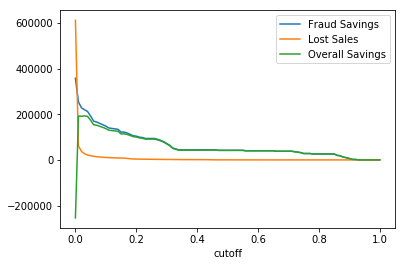

In [297]:
plot_data.plot()

In [316]:
rfc_oot_prob = oot_probs.loc[:,['Fraud','rfc']].sort_values('rfc',ascending=False)
rfc_oot_prob['bin'] = 100-pd.qcut(rfc_oot_prob.loc[:,'rfc'],100,labels=False)
plot_data = []
for cutoff in range(1,51):
    temp = rfc_oot_prob[rfc_oot_prob['bin']<=cutoff]
    temp = temp[temp['rfc']>0.5]
    #temp['pred'] = rfc_oot_prob['rfc']>0.5
    #gain = 2000*sum((temp['Fraud']==1)&(temp['pred']==1))
    #loss = 50*sum((temp['Fraud']==0)&(temp['pred']==1))
    gain = 2000*sum(temp['Fraud'])
    loss = 50*sum(temp['Fraud']==0)
    saving = gain-loss
    plot_data.append([cutoff,gain,loss,saving])
plot_data = pd.DataFrame(plot_data, columns=['cutoff','Fraud Savings','Lost Sales','Overall Savings'])
plot_data = plot_data.set_index('cutoff')

In [317]:
plot_data.head()

,Fraud Savings,Lost Sales,Overall Savings
cutoff,,,
1,42000,250,41750
2,42000,250,41750
3,42000,250,41750
4,42000,250,41750
5,42000,250,41750


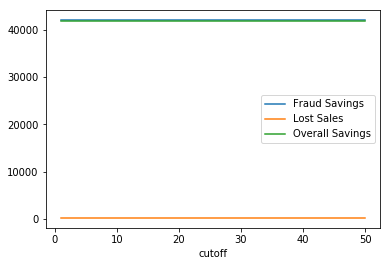

In [318]:
plot_data.plot()

In [302]:
rfc_oot_pred = rfc.predict(X_oot)

In [307]:
rfc_oot_prob = pd.DataFrame(rfc.predict_proba(X_oot)).iloc[:,1]

In [312]:
rfc_temp = pd.DataFrame({'pred':rfc_oot_pred,'prob':rfc_oot_prob,'Fraud':y_oot.reset_index(drop=True)})

In [315]:
rfc_temp = rfc_temp.sort_values('prob',ascending=False)
rfc_temp['bin'] = 100-pd.qcut(rfc_temp['prob'],100,labels=False)

In [328]:
(rfc_temp['Fraud']==1).sum()

179

In [326]:
(rfc_temp['pred']==1).sum()

26

In [325]:
((rfc_temp['bin']==1)&(rfc_temp['pred']==1)).sum()

26

In [327]:
((rfc_temp['bin']>=2)&(rfc_temp['pred']==1)).sum()

0

In [329]:
rfc_oot_prob = oot_probs.loc[:,['Fraud','rfc']].sort_values('rfc',ascending=False)
rfc_oot_prob['bin'] = 100-pd.qcut(rfc_oot_prob.loc[:,'rfc'],100,labels=False)
plot_data = []
for cutoff in range(1,51):
    temp = rfc_oot_prob[rfc_oot_prob['bin']<=cutoff]
    gain = 2000*sum(temp['Fraud'])
    loss = 50*sum(temp['Fraud']==0)
    saving = gain-loss
    plot_data.append([cutoff,gain,loss,saving])
plot_data = pd.DataFrame(plot_data, columns=['cutoff','Fraud Savings','Lost Sales','Overall Savings'])
plot_data = plot_data.set_index('cutoff')

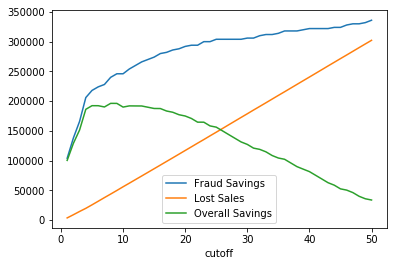

In [331]:
plot_data.plot()
plt.savefig('savings_plot.png')